# Part 2: Modeling and Testing

by Sibi Seenivasan

## 1. Loading data

In [95]:
import pandas as pd

# For Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.layouts import column

# Configuration for graphs
sns.set_theme(style='whitegrid')
palette='viridis'

# For modeling
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier, plot_importance as plot_importance_xgb
from lightgbm import LGBMClassifier, plot_importance as plot_importance_lgbm

# Metrics and model evaluation
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report, f1_score

# For saving model later
import os
import json
import pickle
from datetime import datetime

In [62]:
df = pd.read_csv("cleaned_data_project3.csv")
display(df)

,y,x3,x9,x10,x11,x12,x13,x14,x15,x16,...,x20,x21,x22,x25,x26,x28,x4,x5_qbin,x23_qbin,x31_qbin
0,1,1,5,5,5,4,3,5,3,3,...,3,4,3,0,0,1,4,7,3,2
1,1,1,1,1,1,1,3,3,1,4,...,4,4,2,1,0,1,4,5,0,4
2,0,1,3,1,5,5,3,2,2,3,...,1,3,2,1,0,3,4,9,0,4
3,0,1,1,3,1,3,5,1,5,5,...,1,4,5,1,1,3,4,4,0,4
4,1,0,5,5,5,5,2,5,5,4,...,4,4,5,1,0,1,4,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103672,1,0,5,5,5,5,5,5,5,5,...,3,5,5,1,0,1,4,2,4,0
103673,0,1,1,4,4,4,4,2,4,1,...,3,1,3,1,0,2,4,9,1,3
103674,0,0,3,4,3,5,1,3,1,1,...,3,4,1,1,1,3,4,6,2,2
103675,0,0,2,4,2,2,4,2,4,4,...,2,3,4,1,1,2,4,8,0,4


## 2. Preparing for modeling

In [63]:
# Split the data into features (X) and target (y)
X = df.drop("y", axis=1)
y = df["y"]

In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [65]:
# Splitting the train dataset further into train and val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=26)

In [58]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(93309, 22)
(10368, 22)
(20736, 22)

(93309,)
(10368,)
(20736,)


## 3. Part A: Logistic Regression model

In [66]:
model = LogisticRegression()

In [67]:
model.fit(X_train, y_train)   # model fitting

LogisticRegression()

In [68]:
y_pred_val = model.predict(X_val)  # model prediction
y_pred_val[:10]

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

### Evaluating the LR model on the validation dataset

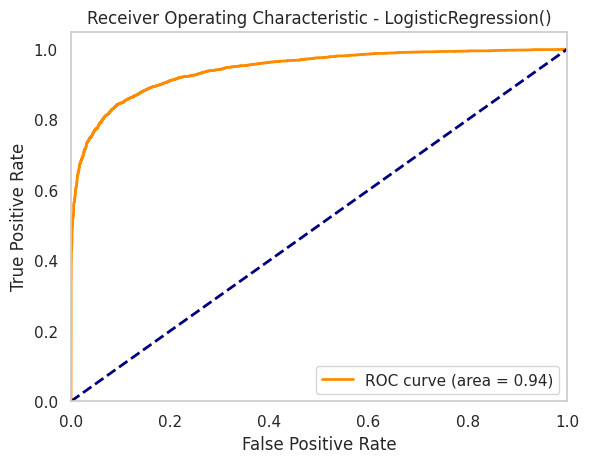

In [69]:
fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
print()
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - {}'.format(model))
plt.legend(loc="lower right")
plt.grid(False)
plt.show()


True Positives (TP) =  5256

True Negatives (TN) =  3851

False Positives (FP) =  544

False Negatives (FN) =  717


Accuracy: 0.88


F1 Score: 0.86




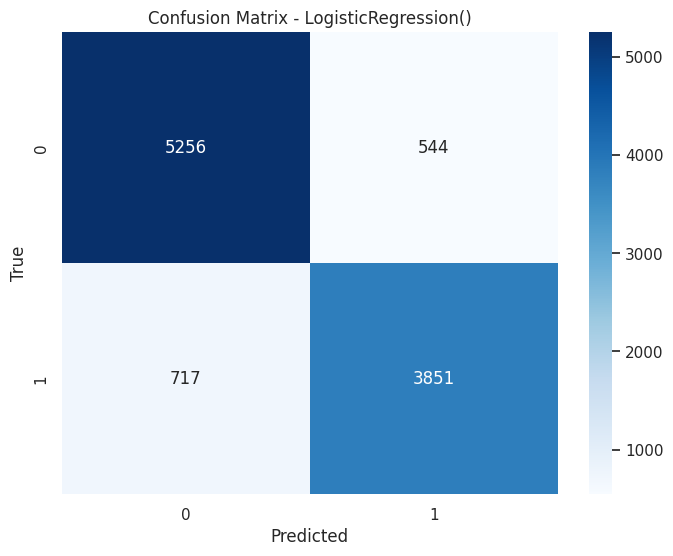



Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      5800
           1       0.88      0.84      0.86      4568

    accuracy                           0.88     10368
   macro avg       0.88      0.87      0.88     10368
weighted avg       0.88      0.88      0.88     10368



In [71]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_val)
print('\nTrue Positives (TP) = ', cm[0,0])
print('\nTrue Negatives (TN) = ', cm[1,1])
print('\nFalse Positives (FP) = ', cm[0,1])
print('\nFalse Negatives (FN) = ', cm[1,0])
print()
print()

# Accuracy
acc = accuracy_score(y_val, y_pred_val)
print(f"Accuracy: {acc:.2f}")
print()
print()

# F1 Score
f1 = f1_score(y_val, y_pred_val)
print(f"F1 Score: {f1:.2f}")
print()
print()

# Plotting the confusion matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - {}'.format(model))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print()
print()

# Classification Report
print("Classification Report:")
print(classification_report(y_val, y_pred_val))

### Hyperparameter Tuning

In [19]:
param_dist_lg = {
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1],
    'max_iter': [10, 100]
}

# Initialize RandomizedSearchCV
lg_random = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=param_dist_lg, scoring='roc_auc')

In [20]:
#  Fit the model to the data
lg_random.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1],
                                        'max_iter': [10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   scoring='roc_auc')

In [21]:
# Get the best parameters
print(lg_random.best_params_)
# Loading the best model
lg_model = lg_random.best_estimator_

{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 10, 'C': 0.1}


In [72]:
y_pred_val = lg_model.predict(X_val)  # model prediction
y_pred_val[:10]

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

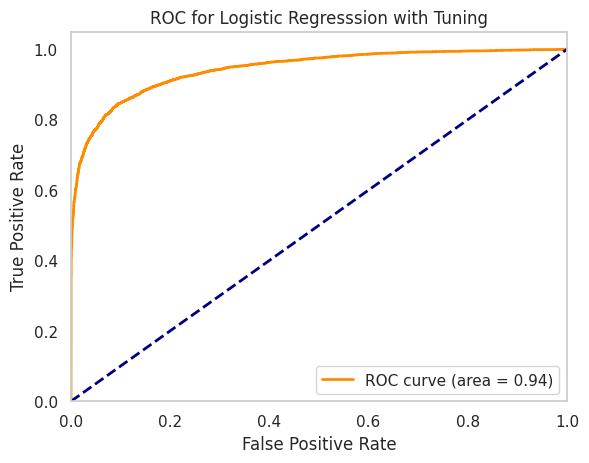

In [73]:
fpr, tpr, _ = roc_curve(y_val, lg_model.predict_proba(X_val)[:,1])
roc_auc_1 = auc(fpr, tpr)

# Plotting the ROC Curve
print()
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regresssion with Tuning')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()


True Positives (TP) =  5258

True Negatives (TN) =  3850

False Positives (FP) =  542

False Negatives (FN) =  718


Accuracy: 0.88


F1 Score: 0.86




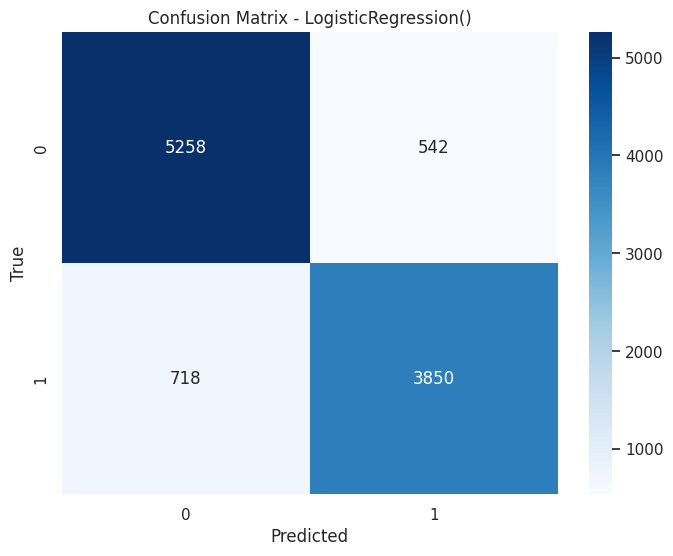



Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      5800
           1       0.88      0.84      0.86      4568

    accuracy                           0.88     10368
   macro avg       0.88      0.87      0.88     10368
weighted avg       0.88      0.88      0.88     10368



In [74]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_val)
print('\nTrue Positives (TP) = ', cm[0,0])
print('\nTrue Negatives (TN) = ', cm[1,1])
print('\nFalse Positives (FP) = ', cm[0,1])
print('\nFalse Negatives (FN) = ', cm[1,0])
print()
print()

# Accuracy
acc_1 = accuracy_score(y_val, y_pred_val)
print(f"Accuracy: {acc:.2f}")
print()
print()

# F1 Score
f1_1 = f1_score(y_val, y_pred_val)
print(f"F1 Score: {f1:.2f}")
print()
print()

# Plotting the confusion matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - {}'.format(model))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print()
print()

# Classification Report
print("Classification Report:")
print(classification_report(y_val, y_pred_val))

Even after hyperparameter tuning, we got the same results (I had tried with more parameters separately too).

Now we move on to evaluating on the unseen test dataset

### Testing the tuned Logistic model

In [75]:
y_predict = lg_model.predict(X_test)
y_predict[:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

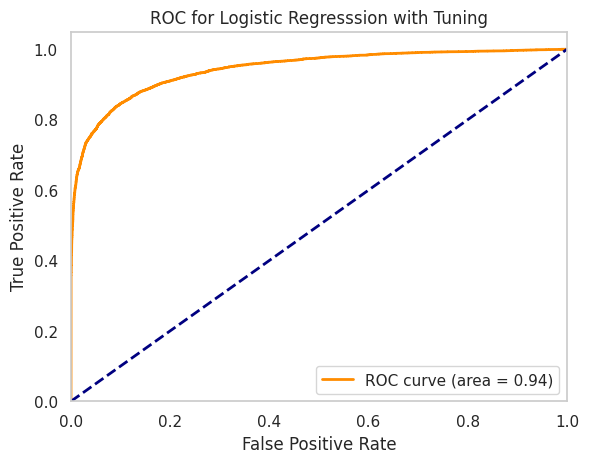



Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11758
           1       0.88      0.84      0.86      8978

    accuracy                           0.88     20736
   macro avg       0.88      0.87      0.87     20736
weighted avg       0.88      0.88      0.88     20736



Accuracy: 0.88
F1 Score: 0.86




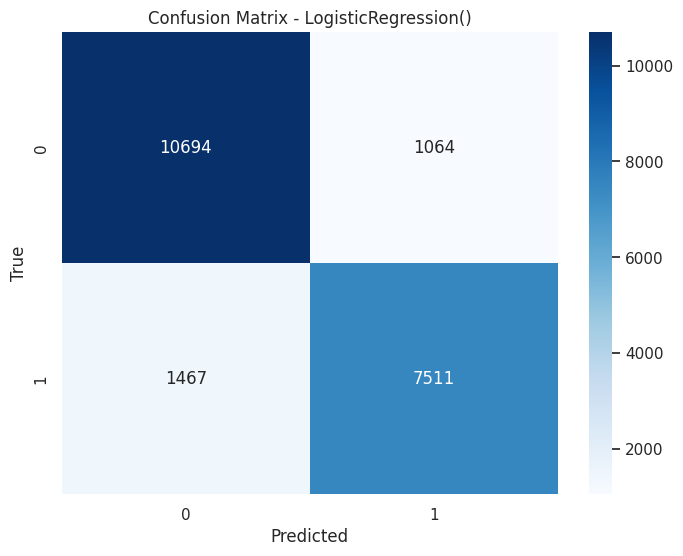

In [77]:
fpr, tpr, _ = roc_curve(y_test, lg_model.predict_proba(X_test)[:,1])
roc_auc_1 = auc(fpr, tpr)

# Plotting the ROC Curve
print()
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regresssion with Tuning')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()
print()
print()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_predict))
print()
print()

# Accuracy
acc_1 = accuracy_score(y_test, y_predict)
print(f"Accuracy: {acc:.2f}")

# F1 Score
f1_1 = f1_score(y_test, y_predict)
print(f"F1 Score: {f1:.2f}")
print()
print()

# Plotting the confusion matrix with Seaborn
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - {}'.format(model))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [84]:
print(f"Accuracy: {acc_1:.2f}")
print(f"F1 Score: {f1_1:.2f}")
print(f"AUC: {roc_auc_1:.2f}")

Accuracy: 0.88
F1 Score: 0.86
AUC: 0.94


## Part B: Advanced Model - Random Forest, Gradient Boosting, XGBoost and LightGBM

For the advanced model, I am gonna run a loop to train all these 4 models, and then select the top performing model on the validation dataset to implement hyperparameter tuning to see if we can improve its performance even more, before finally evaluating on the test dataset.

In [26]:
# Defining the models
models = {# Random Forest model
    "Random Forest": RandomForestClassifier(),

    # Gradient Boosting model
    "Gradient Boosting": GradientBoostingClassifier(),

    # XGBoost model
    "XGBoost": XGBClassifier(),

    # LightGBM model
    "LightGBM": LGBMClassifier()
}


Machine Learning Model: Random Forest





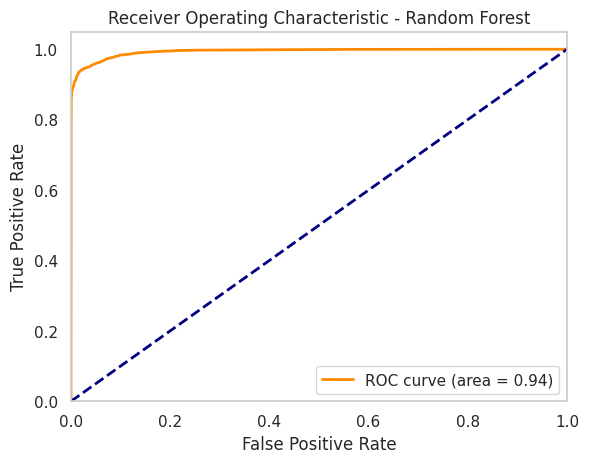

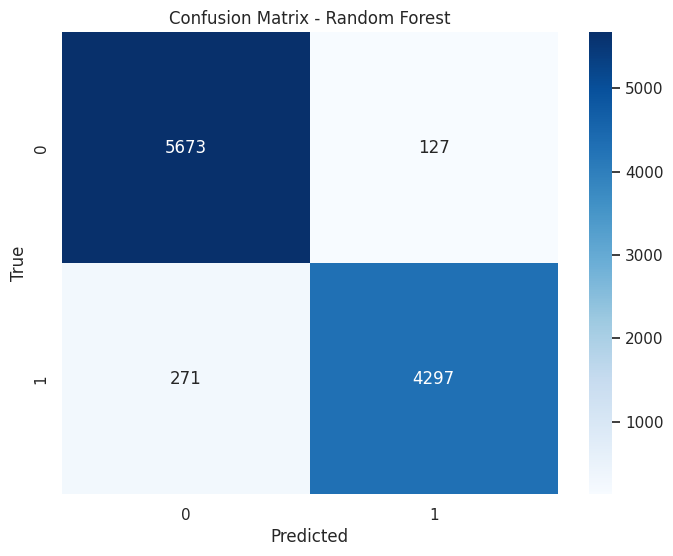



Accuracy: 0.8783757716049383
F1 Score: 0.9557384341637011


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5800
           1       0.97      0.94      0.96      4568

    accuracy                           0.96     10368
   macro avg       0.96      0.96      0.96     10368
weighted avg       0.96      0.96      0.96     10368


Machine Learning Model: Gradient Boosting





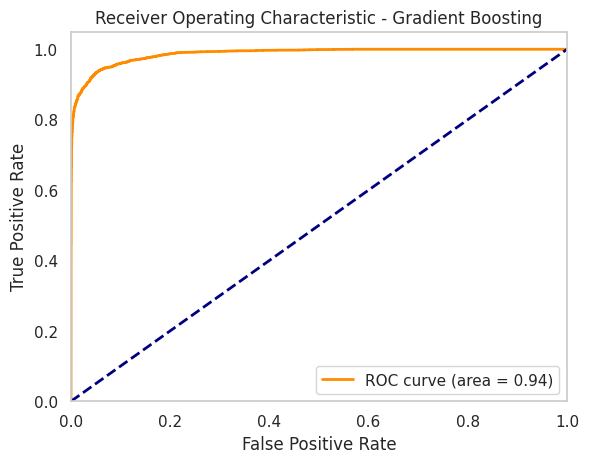

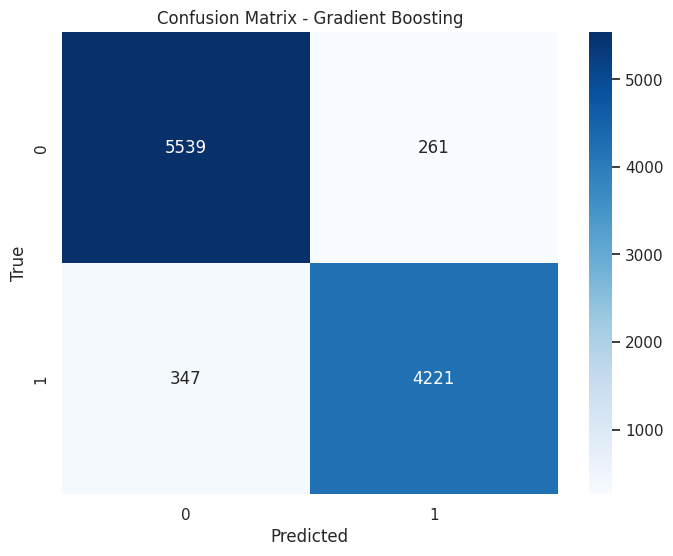



Accuracy: 0.8783757716049383
F1 Score: 0.9328176795580111


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5800
           1       0.94      0.92      0.93      4568

    accuracy                           0.94     10368
   macro avg       0.94      0.94      0.94     10368
weighted avg       0.94      0.94      0.94     10368


Machine Learning Model: XGBoost





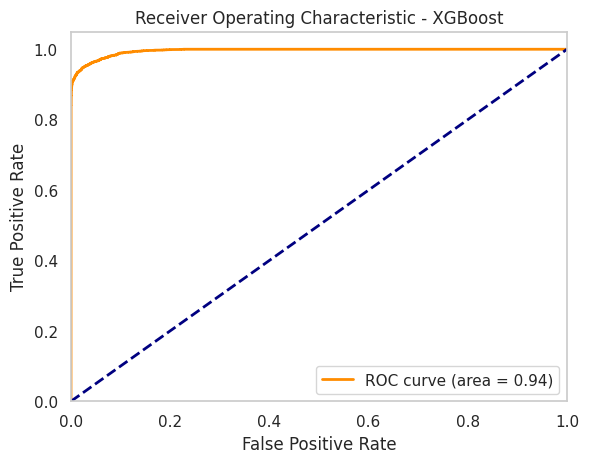

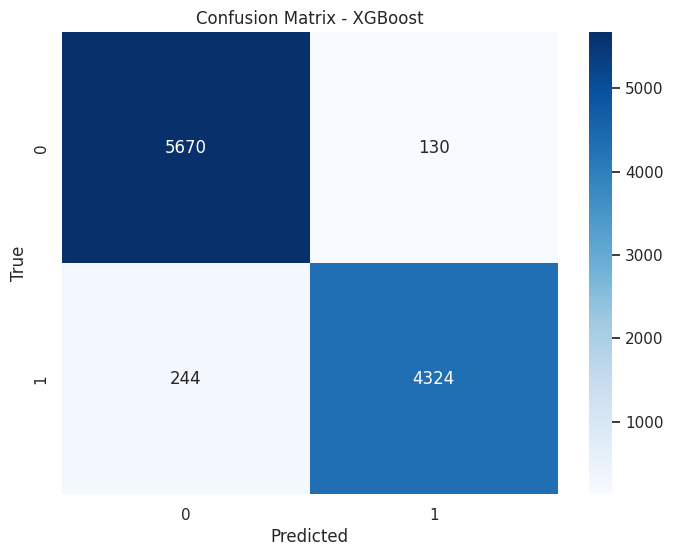



Accuracy: 0.8783757716049383
F1 Score: 0.958545776989581


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5800
           1       0.97      0.95      0.96      4568

    accuracy                           0.96     10368
   macro avg       0.96      0.96      0.96     10368
weighted avg       0.96      0.96      0.96     10368

[LightGBM] [Info] Number of positive: 40242, number of negative: 53067
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 114
[LightGBM] [Info] Number of data points in the train set: 93309, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.431277 -> initscore=-0.276644
[LightGBM] [Info] Start training from score -0.276644

Machine Learning Model: LightGB

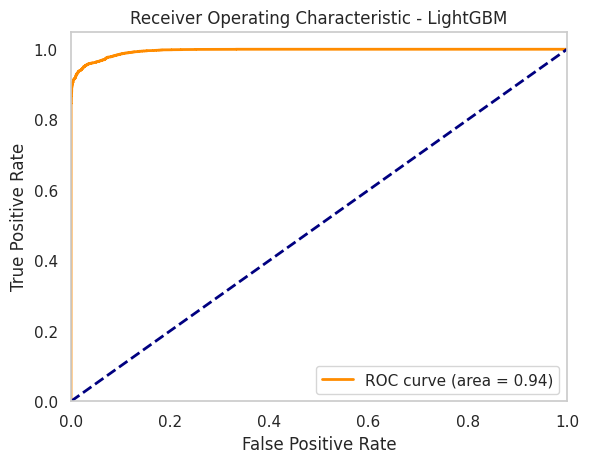

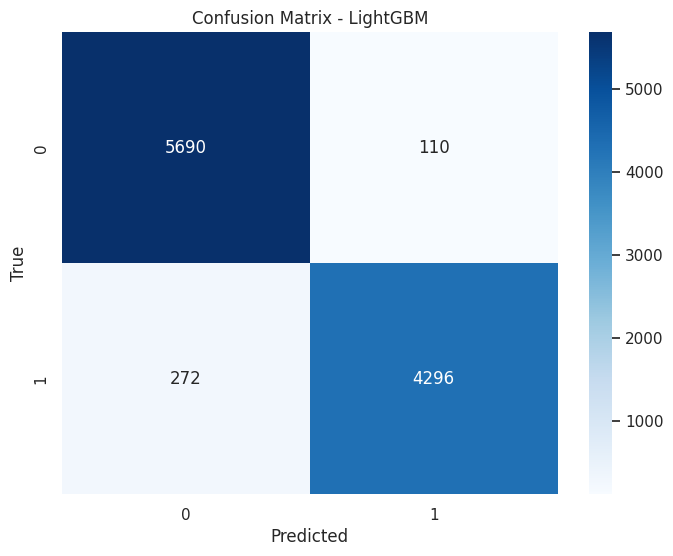



Accuracy: 0.8783757716049383
F1 Score: 0.9574325830176064


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5800
           1       0.98      0.94      0.96      4568

    accuracy                           0.96     10368
   macro avg       0.96      0.96      0.96     10368
weighted avg       0.96      0.96      0.96     10368



In [78]:
metrics = {}
# Iterating over each model
for name, model in models.items():

    # Training the model
    model.fit(X_train, y_train)

    # Prediction on the val set
    y_pred = model.predict(X_val)

    print()
    print("Machine Learning Model:", name)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:,1])
    roc_auc_0 = auc(fpr, tpr)
    print()
    print()

    # Plotting the ROC Curve
    print()
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - {}'.format(name))
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()
    print()
    print()

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - {}'.format(name))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print()
    print()

    # Accuracy
    acc_0 = accuracy_score(y_val, y_pred)
    print("Accuracy:", acc)

    # F1 Score
    f1_0 = f1_score(y_val, y_pred)
    print("F1 Score:", f1_0)
    print()
    print()

    # Storing the metrics in the dictionary
    metrics[name] = {
        'Accuracy': acc_0, 'F1': f1_0, 'AUC': roc_auc_0}

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

### Analysing the results

In [79]:
metrics['Logistic Regression'] = {'Accuracy': acc_1, 'F1': f1_1, 'AUC': roc_auc_1}
metrics

{'Random Forest': {'Accuracy': 0.9616126543209876,
  'F1': 0.9557384341637011,
  'AUC': np.float64(0.9936541118123075)},
 'Gradient Boosting': {'Accuracy': 0.941358024691358,
  'F1': 0.9328176795580111,
  'AUC': np.float64(0.9870391478954044)},
 'XGBoost': {'Accuracy': 0.9639274691358025,
  'F1': 0.958545776989581,
  'AUC': np.float64(0.9954836116311372)},
 'LightGBM': {'Accuracy': 0.9631558641975309,
  'F1': 0.9574325830176064,
  'AUC': np.float64(0.9952043261972341)},
 'Logistic Regression': {'Accuracy': 0.8779417438271605,
  'F1': 0.855808123967413,
  'AUC': np.float64(0.9436624030520298)}}

In [80]:
# Creating a DataFrame with the results
df_metrics = pd.DataFrame(metrics).T

# Displaying the DataFrame sorted
df_metrics_sorted = df_metrics.sort_values(by='Accuracy', ascending=False)
df_metrics_sorted

,Accuracy,F1,AUC
XGBoost,0.963927,0.958546,0.995484
LightGBM,0.963156,0.957433,0.995204
Random Forest,0.961613,0.955738,0.993654
Gradient Boosting,0.941358,0.932818,0.987039
Logistic Regression,0.877942,0.855808,0.943662


From this, we can clearly see that the **XGBoost** model commands a slight lead over the **LightGBM** model, even though both are ensemble methods.

### Tuning XGBoost model

In [46]:
param_dist_xgb = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'n_estimators': [300, 500, 800, 1200],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 2, 5]
}

In [47]:
xgb_tune = RandomizedSearchCV(estimator=XGBClassifier(eval_metric='logloss', use_label_encoder=False),
                              param_distributions=param_dist_xgb,
                              scoring='accuracy',
                              n_jobs=-1,
                              verbose=1)

In [48]:
xgb_tune.fit(X_train, y_train)

print("Best Parameters:", xgb_tune.best_params_)
print("Best CV AUC:", xgb_tune.best_score_)

# Loading the best model found
best_model = xgb_tune.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:36:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 1200, 'max_depth': 8, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.7}
Best CV AUC: 0.9638899700867436


### Validating the best model

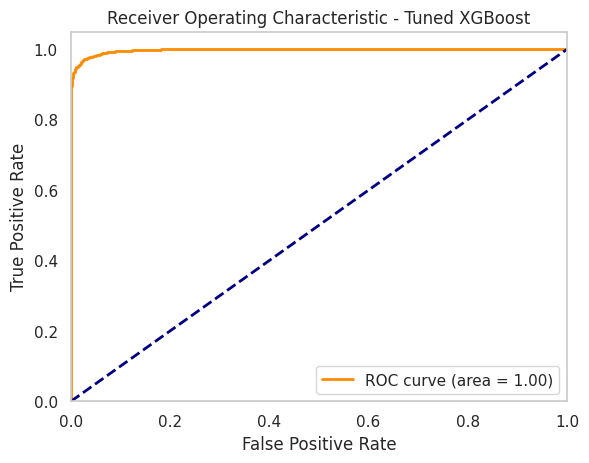

In [85]:
fpr, tpr, _ = roc_curve(y_val, best_model.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
print()
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Tuned XGBoost')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()


True Positives (TP) =  5722

True Negatives (TN) =  4345

False Positives (FP) =  78

False Negatives (FN) =  223


Accuracy: 0.97


F1 Score: 0.97




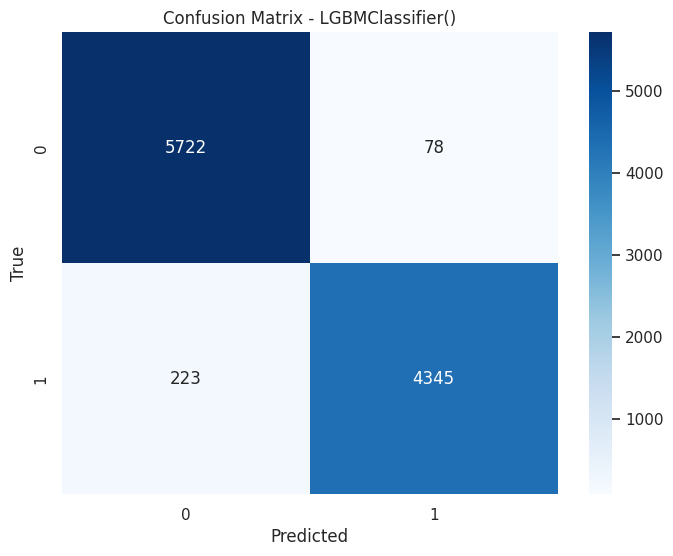



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5800
           1       0.98      0.95      0.97      4568

    accuracy                           0.97     10368
   macro avg       0.97      0.97      0.97     10368
weighted avg       0.97      0.97      0.97     10368



In [86]:
y_predict = best_model.predict(X_val)
# Confusion Matrix
cm = confusion_matrix(y_val, y_predict)
print('\nTrue Positives (TP) = ', cm[0,0])
print('\nTrue Negatives (TN) = ', cm[1,1])
print('\nFalse Positives (FP) = ', cm[0,1])
print('\nFalse Negatives (FN) = ', cm[1,0])
print()
print()

# Accuracy
acc = accuracy_score(y_val, y_predict)
print(f"Accuracy: {acc:.2f}")
print()
print()

# F1 Score
f1 = f1_score(y_val, y_predict)
print(f"F1 Score: {f1:.2f}")
print()
print()

# Plotting the confusion matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - {}'.format(model))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print()
print()

# Classification Report
print("Classification Report:")
print(classification_report(y_val, y_predict))

In [51]:
metrics['Tuned XGBoost'] = {'Accuracy': acc, 'F1': f1, 'AUC': roc_auc}
metrics

{'Random Forest': {'Accuracy': 0.9620466820987654,
  'F1': 0.9554637541735046,
  'AUC': np.float64(0.9937883208376425)},
 'Gradient Boosting': {'Accuracy': 0.9425636574074074,
  'F1': 0.9329051884400879,
  'AUC': np.float64(0.9875324975556852)},
 'XGBoost': {'Accuracy': 0.9651331018518519,
  'F1': 0.9592882482121741,
  'AUC': np.float64(0.9953664304848908)},
 'LightGBM': {'Accuracy': 0.9642650462962963,
  'F1': 0.9580716346969954,
  'AUC': np.float64(0.9950087920687303)},
 'Logistic Regression': {'Accuracy': 0.8779417438271605,
  'F1': 0.855808123967413,
  'AUC': np.float64(0.9436624030520298)},
 'Tuned XGBoost': {'Accuracy': 0.9656153549382716,
  'F1': 0.9596742265708953,
  'AUC': np.float64(0.9951561585915958)}}

In [52]:
df_metrics = pd.DataFrame(metrics).T

# Displaying the DataFrame sorted
df_metrics_sorted = df_metrics.sort_values(by='Accuracy', ascending=False)
df_metrics_sorted

,Accuracy,F1,AUC
Tuned XGBoost,0.965615,0.959674,0.995156
XGBoost,0.965133,0.959288,0.995366
LightGBM,0.964265,0.958072,0.995009
Random Forest,0.962047,0.955464,0.993788
Gradient Boosting,0.942564,0.932905,0.987532
Logistic Regression,0.877942,0.855808,0.943662


## Final Testing & Insights

Finally, I tested the top performing XGBoost model, with hyperparameter tuning, on the test dataset.

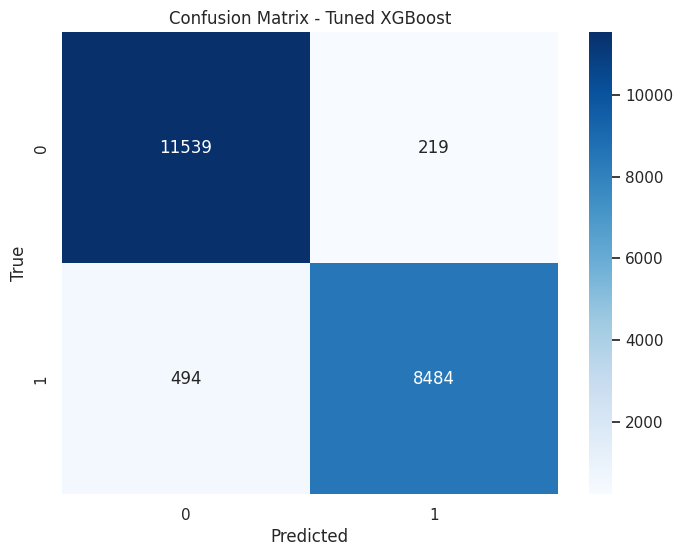



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11758
           1       0.97      0.94      0.96      8978

    accuracy                           0.97     20736
   macro avg       0.97      0.96      0.96     20736
weighted avg       0.97      0.97      0.97     20736



In [94]:
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

y_predict = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print()
print()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_predict))

(Tried bokeh plot once for ROC curve alone)

In [90]:
# ROC Curve
output_notebook()

# Preparing data
source = ColumnDataSource(data=dict(
    fpr=fpr,
    tpr=tpr,
))

# Creating ROC figure
p1 = figure(
    title="Interactive ROC Curve - Tuned XGBoost",
    x_axis_label='False Positive Rate',
    y_axis_label='True Positive Rate',
    width=600,
    height=400,
    tools="pan,wheel_zoom,box_zoom,reset,save"
)

# Adding ROC line
p1.line('fpr', 'tpr', source=source, line_width=3, color="darkorange",
        legend_label=f"ROC Curve (AUC = {roc_auc:.2f})")
p1.line([0, 1], [0, 1], line_width=2, color="navy", line_dash="dashed")

# Adding HoverTool
hover = HoverTool(
    tooltips=[
        ("FPR", "@fpr{0.000}"),
        ("TPR", "@tpr{0.000}")
    ],
    mode='mouse'
)
p1.add_tools(hover)
p1.legend.location = "bottom_right"

show(p1)

### Feature Importance

**Feature Importance Analysis: Revealing the Most Relevant Factors**

This is a crucial step of analysis for real variables, we explore the importance of features to understand which variables have the greatest impact on our model's prediction. Feature importance analysis provides valuable insights into which aspects of the data are most relevant to the model's decision-making.

In [54]:
# Training the models and obtaining their feature importances
best_model.fit(X_train, y_train)

# Check if the model has 'feature_importances_' or 'coef_' attributes
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
elif hasattr(best_model, 'coef_'):
    feature_importances = best_model.coef_[0]
else:
    feature_importances = None
    print("The model does not have 'feature_importances_' or 'coef_' attributes.")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:12:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


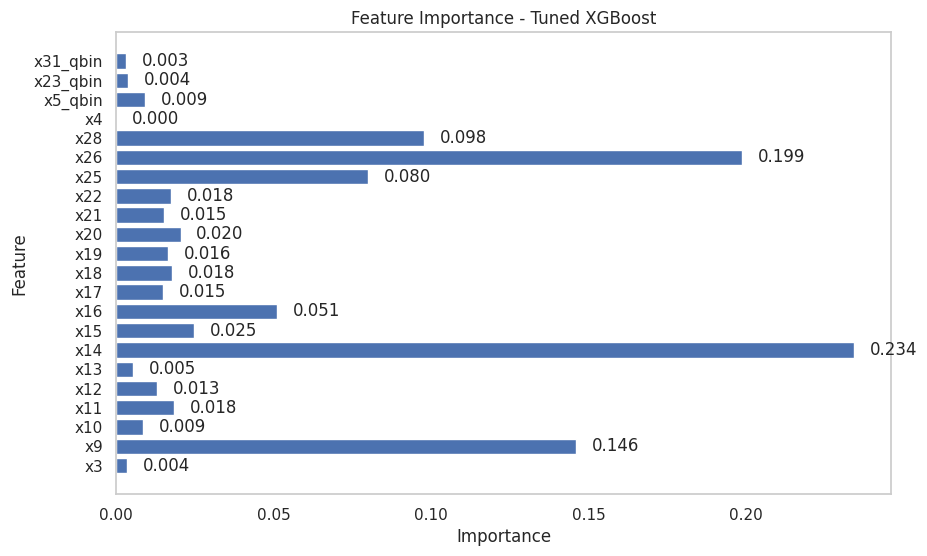

In [56]:
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(feature_importances)), feature_importances)

plt.title("Feature Importance - Tuned XGBoost")
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.grid(False)
plt.yticks(range(len(feature_importances)), X_train.columns)

# Add values next to bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(
        width + 0.005,
        bar.get_y() + bar.get_height()/2,
        f"{width:.3f}",
        va='center'
    )

plt.show()

From this we can clearly see `x14`, `x26`, and `x9` dominate the model, having a total importance of **~ 58%**.

# Conclusion

I started this project by cleaning the data and establishing a baseline using a **Logistic Regression** model, which yielded an Accuracy of `0.88` and an AUC of `0.94` on the test set.

I then moved on to advanced models to see if I could improve performance, running a comparison between **Random Forest, Gradient Boosting, XGBoost**, and **LightGBM**. From the validation results, we can clearly see that the XGBoost model commanded a slight lead over the others.

Finally, I implemented hyperparameter tuning on the XGBoost model and evaluated it on the unseen test dataset. The **tuned XGBoost** model demonstrated superior predictive capability, with an Accuracy of `0.97` and AUC of almost `1.00` compared to the baseline Logistic Regression, confirming it as the most robust model for this dataset.